In [351]:
import datetime
import pandas as pd
from tensorflow.python.keras.layers.core import Dropout
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re 
import matplotlib.pyplot as plt
import random
from pandas_datareader import data
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1500)



In [352]:
news_data = pd.read_excel("newsDb.xlsx") 
# print(news_data.head())
# print(news_data.head())
historical_data = pd.read_excel("finaceDbTSLA.xlsx")
# print(historical_data.head())

merged_data = news_data.merge(historical_data, left_on='dateTime', right_on='Date') #merge two data frame
# print(merged_data.head())#show a couples of merged data.
merged_data.to_excel("deneme.xlsx")

In [353]:

headlines= []
for row in range(0, len(merged_data.index)):
    headlines.append(' '.join(str(x) for x in merged_data.iloc[row, 1:11]))
# print(headlines[0])

clean_headlines = []
for i in range(0, len(headlines)):
  clean_headlines.append(re.sub("b[(')]", '', headlines[i]))
  clean_headlines[i] = re.sub('b[(")]', '', headlines[i])
  clean_headlines[i] = re.sub("\'", '', headlines[i]) #replace ' && " with nulls.
# print(clean_headlines[0])
# print(len(clean_headlines))  #headline içerisinde nan yazıları kaldırılmalı!

merged_data['Combined_News'] = clean_headlines

In [354]:

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity 

In [355]:

merged_data['Subjectivity']=merged_data['article'].apply(getSubjectivity)
merged_data['Polarity']=merged_data['article'].apply(getPolarity)
print(merged_data)


      dateTime                                                 H1  \
0   2021-12-14  California senator scrutinizing Tesla’s Full S...   
1   2021-12-13  Ticker: Time names Elon Musk “Person of the Ye...   
2   2021-12-10  North Carolina chases more success at home vs....   
3   2021-12-09  Drivers playing video games? U.S. is looking i...   
4   2021-12-08  BofA Explains Neutral Rating for Tesla, Buy fo...   
5   2021-12-07  Tesla's Musk says Biden's electric vehicle bil...   
6   2021-12-06  Interview With Cassava Sciences' CEO Remi Barb...   
7   2021-12-03  Robeco Institutional Asset Management B.V. Low...   
8   2021-12-02  Mirrored Tesla Tops 24 Hour Trading Volume of ...   
9   2021-12-01  Tesla officially moves headquarters from Calif...   
10  2021-11-30  Cramer's Mad Money Recap 11/30: Amazon, Micros...   
11  2021-11-29  Elon Musk’s California exit can save him $2 bi...   
12  2021-11-26  Great Valley Advisor Group Inc. Has $4.10 Mill...   
13  2021-11-24  Musk sells more th

In [356]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [357]:
compound=[]
SIA=0
for i in range(0,len(merged_data['Combined_News'])):
    SIA = getSIA(merged_data['Combined_News'][i])
    compound.append(SIA['compound'])

In [358]:
merged_data['Compound']=compound


In [359]:
merged_data.to_excel('merged_data_tesla4.xlsx')


In [663]:
merged_data = pd.read_excel("final_data.xlsx")

In [664]:
keep_columns=['Open','High','Low','Volume','Subjectivity','Polarity','Compound']


In [665]:
y_values = np.array(merged_data['Close'])


In [666]:
y_values

array([ 332.799988,  310.119995,  300.359985,  317.690002,  334.959991,
        335.350006,  338.529999,  344.970001,  347.26001 ,  334.399994,
        344.429993,  346.049988,  347.309998,  302.26001 ,  298.920013,
        287.589996,  291.51001 ,  297.040009,  296.380005,  297.459991,
        308.769989,  307.019989,  312.209991,  312.890015,  321.350006,
        317.220001,  307.51001 ,  305.799988,  312.839996,  311.809998,
        308.170013,  303.769989,  307.880005,  305.640015,  302.559998,
        291.230011,  294.709991,  298.769989,  297.859985,  314.73999 ,
        319.880005,  294.790009,  285.359985,  276.540009,  276.23999 ,
        276.589996,  284.140015,  290.920013,  283.359985,  288.959991,
        289.959991,  275.429993,  269.48999 ,  267.470001,  273.600006,
        274.019989,  264.529999,  260.420013,  267.769989,  274.829987,
        278.619995,  279.859985,  289.179993,  285.880005,  291.809998,
        267.779999,  274.959991,  273.200012,  272.309998,  276.

In [667]:
y_values.shape

(746,)

In [668]:
x_values=merged_data[keep_columns].values #numpy array.

In [669]:
x_values

array([[ 3.37790009e+02,  3.39209991e+02,  3.25260010e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.06100006e+02,  3.15130005e+02,  2.98799988e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.07000000e+02,  3.09399994e+02,  2.97380005e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.00875000e+03,  1.02097998e+03,  9.82530029e+02, ...,
         5.95344828e-01,  2.19166667e-01,  9.04100000e-01],
       [ 1.00109003e+03,  1.00500000e+03,  9.51419983e+02, ...,
         6.50000000e-01,  1.03409091e-01, -3.19700000e-01],
       [ 9.45000000e+02,  9.66409973e+02,  9.30000000e+02, ...,
         3.57913165e-01,  1.68137255e-01, -9.34900000e-01]])

In [670]:
x_values.shape

(746, 7)

In [671]:

training_size=int(len(x_values)*0.75)
test_size=len(y_values)-training_size
x_train,x_test=x_values[0:training_size,:],x_values[training_size:len(x_values),:]
y_train, y_test = y_values[0:training_size], y_values[training_size:len(y_values)]

In [672]:
y_train

array([332.799988, 310.119995, 300.359985, 317.690002, 334.959991,
       335.350006, 338.529999, 344.970001, 347.26001 , 334.399994,
       344.429993, 346.049988, 347.309998, 302.26001 , 298.920013,
       287.589996, 291.51001 , 297.040009, 296.380005, 297.459991,
       308.769989, 307.019989, 312.209991, 312.890015, 321.350006,
       317.220001, 307.51001 , 305.799988, 312.839996, 311.809998,
       308.170013, 303.769989, 307.880005, 305.640015, 302.559998,
       291.230011, 294.709991, 298.769989, 297.859985, 314.73999 ,
       319.880005, 294.790009, 285.359985, 276.540009, 276.23999 ,
       276.589996, 284.140015, 290.920013, 283.359985, 288.959991,
       289.959991, 275.429993, 269.48999 , 267.470001, 273.600006,
       274.019989, 264.529999, 260.420013, 267.769989, 274.829987,
       278.619995, 279.859985, 289.179993, 285.880005, 291.809998,
       267.779999, 274.959991, 273.200012, 272.309998, 276.059998,
       268.420013, 267.700012, 266.380005, 273.359985, 271.230

In [673]:
y_test

array([ 670.      ,  662.159973,  630.27002 ,  640.390015,  618.710022,
        611.289978,  635.619995,  667.929993,  661.75    ,  691.049988,
        691.619995,  670.969971,  683.799988,  677.02002 ,  701.97998 ,
        762.320007,  732.22998 ,  738.849976,  739.780029,  714.630005,
        718.98999 ,  744.119995,  719.690002,  729.400024,  738.200012,
        704.73999 ,  694.400024,  677.      ,  709.440002,  684.900024,
        673.599976,  670.940002,  663.539978,  672.369995,  629.039978,
        617.200012,  589.890015,  571.690002,  589.73999 ,  576.830017,
        577.869995,  563.460022,  586.780029,  580.880005,  606.440002,
        604.690002,  619.130005,  630.849976,  625.219971,  623.900024,
        605.119995,  572.840027,  599.049988,  605.130005,  603.590027,
        598.780029,  610.119995,  609.890015,  617.690002,  599.359985,
        604.869995,  616.599976,  623.309998,  620.830017,  623.710022,
        656.570007,  679.820007,  671.869995,  688.719971,  680.

In [674]:
print(x_train.shape, x_test.shape, y_train.shape)

(559, 7) (187, 7) (559,)


In [675]:
#scaling
scaler = MinMaxScaler(feature_range=(0,1))
x_train=scaler.fit_transform(x_train) # hem fit ediyor hem de scale ediyor. //prediction gerceklesiyor.
x_test=scaler.transform(x_test) # sadece transform olacak. cünkü model bu veriyi eğitim esnasında görmeyecek //prediction uygulayacak.


In [676]:
y_train = np.array([y_train]).T
y_test = np.array([y_test]).T

In [677]:
y_train.shape

(559, 1)

In [678]:
y_train

array([[332.799988],
       [310.119995],
       [300.359985],
       [317.690002],
       [334.959991],
       [335.350006],
       [338.529999],
       [344.970001],
       [347.26001 ],
       [334.399994],
       [344.429993],
       [346.049988],
       [347.309998],
       [302.26001 ],
       [298.920013],
       [287.589996],
       [291.51001 ],
       [297.040009],
       [296.380005],
       [297.459991],
       [308.769989],
       [307.019989],
       [312.209991],
       [312.890015],
       [321.350006],
       [317.220001],
       [307.51001 ],
       [305.799988],
       [312.839996],
       [311.809998],
       [308.170013],
       [303.769989],
       [307.880005],
       [305.640015],
       [302.559998],
       [291.230011],
       [294.709991],
       [298.769989],
       [297.859985],
       [314.73999 ],
       [319.880005],
       [294.790009],
       [285.359985],
       [276.540009],
       [276.23999 ],
       [276.589996],
       [284.140015],
       [290.9

In [679]:
scaler2 = StandardScaler()
y_train = scaler2.fit_transform(y_train)
y_test = scaler2.transform(y_test)

In [680]:
y_train

array([[-1.15758870e-01],
       [-2.32806409e-01],
       [-2.83176140e-01],
       [-1.93738906e-01],
       [-1.04611466e-01],
       [-1.02598666e-01],
       [-8.61872692e-02],
       [-5.29515275e-02],
       [-4.11331853e-02],
       [-1.07501514e-01],
       [-5.57384159e-02],
       [-4.73779006e-02],
       [-4.08752059e-02],
       [-2.73370439e-01],
       [-2.90607588e-01],
       [-3.49079855e-01],
       [-3.28849338e-01],
       [-3.00309965e-01],
       [-3.03716132e-01],
       [-2.98142510e-01],
       [-2.39773558e-01],
       [-2.48805006e-01],
       [-2.22020299e-01],
       [-2.18510813e-01],
       [-1.74850256e-01],
       [-1.96164500e-01],
       [-2.46276092e-01],
       [-2.55101221e-01],
       [-2.18768952e-01],
       [-2.24084595e-01],
       [-2.42869930e-01],
       [-2.65577697e-01],
       [-2.44366612e-01],
       [-2.55926815e-01],
       [-2.71822252e-01],
       [-3.30294365e-01],
       [-3.12334787e-01],
       [-2.91381836e-01],
       [-2.9

In [681]:
y_test

array([[1.62447234],
       [1.58401131],
       [1.41943276],
       [1.47166031],
       [1.3597736 ],
       [1.32148003],
       [1.44704306],
       [1.61378939],
       [1.58189551],
       [1.73310771],
       [1.73604942],
       [1.6294782 ],
       [1.69569171],
       [1.66070146],
       [1.78951551],
       [2.10092001],
       [1.94563056],
       [1.97979522],
       [1.98459506],
       [1.85480012],
       [1.87730125],
       [2.00699288],
       [1.88091389],
       [1.93102564],
       [1.97644086],
       [1.80375945],
       [1.75039667],
       [1.66059814],
       [1.8280154 ],
       [1.7013688 ],
       [1.6430512 ],
       [1.62932353],
       [1.59113328],
       [1.63670348],
       [1.41308472],
       [1.35198069],
       [1.2110385 ],
       [1.11711137],
       [1.21026425],
       [1.1436381 ],
       [1.14900525],
       [1.07463786],
       [1.1949884 ],
       [1.16453939],
       [1.29645014],
       [1.28741869],
       [1.36194106],
       [1.422

In [682]:
'''
sc2 = MinMaxScaler()
y_train = sc2.fit_transform(y_train.reshape(-1,1))
'''

'\nsc2 = MinMaxScaler()\ny_train = sc2.fit_transform(y_train.reshape(-1,1))\n'

In [683]:
y_test

array([[1.62447234],
       [1.58401131],
       [1.41943276],
       [1.47166031],
       [1.3597736 ],
       [1.32148003],
       [1.44704306],
       [1.61378939],
       [1.58189551],
       [1.73310771],
       [1.73604942],
       [1.6294782 ],
       [1.69569171],
       [1.66070146],
       [1.78951551],
       [2.10092001],
       [1.94563056],
       [1.97979522],
       [1.98459506],
       [1.85480012],
       [1.87730125],
       [2.00699288],
       [1.88091389],
       [1.93102564],
       [1.97644086],
       [1.80375945],
       [1.75039667],
       [1.66059814],
       [1.8280154 ],
       [1.7013688 ],
       [1.6430512 ],
       [1.62932353],
       [1.59113328],
       [1.63670348],
       [1.41308472],
       [1.35198069],
       [1.2110385 ],
       [1.11711137],
       [1.21026425],
       [1.1436381 ],
       [1.14900525],
       [1.07463786],
       [1.1949884 ],
       [1.16453939],
       [1.29645014],
       [1.28741869],
       [1.36194106],
       [1.422

In [684]:
timestep = 1

In [685]:
x_train = x_train.reshape((len(x_train), timestep, len(x_train[0])))

In [686]:
x_test = x_test.reshape((len(x_test), timestep, len(x_test[0])))

In [687]:
print(x_test.shape)

(187, 1, 7)


In [688]:
print(x_train.shape)

(559, 1, 7)


In [689]:

model=Sequential()
model.add(LSTM(units = 50, input_shape = (x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

# model.add(LSTM(units=50,return_sequences=True))
# model.add(LSTM(units=50))
model.add(Dense(units = 1))


In [690]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [691]:
model.fit(x_train, y_train, epochs=100,batch_size=8,verbose=1) # epochs=100


Epoch 1/100
70/70 [==============================] - 3s 4ms/step - loss: 0.8770
Epoch 2/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6521
Epoch 3/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3808
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 0.1227
Epoch 5/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0339
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0215
Epoch 7/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0172
Epoch 8/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0154
Epoch 9/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0138
Epoch 10/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0152
Epoch 11/100
70/70 [==============================] - 0s 4ms/step - loss: 0.0135
Epoch 12/100
70/70 [==============================] - 0s 5ms/step - loss: 0.0125
Epoch 13/100
70/70 [=================

In [692]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

train_predict = train_predict.reshape((train_predict.shape[0], train_predict.shape[2]))

test_predict = test_predict.reshape((test_predict.shape[0], test_predict.shape[2]))


print('y_train shape: ', y_train.shape, '\ny_train', y_train[0:5], '\n')
print('y_train_pred shape: ', train_predict.shape, '\ny_train_pred', train_predict[0:5], '\n')
print('y_test shape: ', y_test.shape, '\ny_test', y_test[0:5], '\n')
print('y_test_pred shape: ', test_predict.shape, '\ny_test_pred', test_predict[0:5])

y_train shape:  (559, 1) 
y_train [[-0.11575887]
 [-0.23280641]
 [-0.28317614]
 [-0.19373891]
 [-0.10461147]] 

y_train_pred shape:  (559, 1) 
y_train_pred [[-0.10433322]
 [-0.24399194]
 [-0.25588956]
 [-0.23055848]
 [-0.14547099]] 

y_test shape:  (187, 1) 
y_test [[1.62447234]
 [1.58401131]
 [1.41943276]
 [1.47166031]
 [1.3597736 ]] 

y_test_pred shape:  (187, 1) 
y_test_pred [[1.7416602]
 [1.6651549]
 [1.5778097]
 [1.4288917]
 [1.4362112]]


In [693]:
test_predict = scaler2.inverse_transform(test_predict)

In [694]:
train_predict = scaler2.inverse_transform(train_predict)

In [695]:
y_train = scaler2.inverse_transform(y_train)
y_test = scaler2.inverse_transform(y_test)

In [696]:
rmse = np.sqrt(mean_squared_error(y_test, test_predict))

In [697]:
rmse

24.845429521149928

In [698]:
mape_test = mean_absolute_percentage_error(y_test, test_predict)
mape_train = mean_absolute_percentage_error(y_train, train_predict)

In [699]:
mape_test

0.018989048759478346

In [700]:
mape_train

0.0183948029122293

In [701]:
y_test

array([[ 670.      ],
       [ 662.159973],
       [ 630.27002 ],
       [ 640.390015],
       [ 618.710022],
       [ 611.289978],
       [ 635.619995],
       [ 667.929993],
       [ 661.75    ],
       [ 691.049988],
       [ 691.619995],
       [ 670.969971],
       [ 683.799988],
       [ 677.02002 ],
       [ 701.97998 ],
       [ 762.320007],
       [ 732.22998 ],
       [ 738.849976],
       [ 739.780029],
       [ 714.630005],
       [ 718.98999 ],
       [ 744.119995],
       [ 719.690002],
       [ 729.400024],
       [ 738.200012],
       [ 704.73999 ],
       [ 694.400024],
       [ 677.      ],
       [ 709.440002],
       [ 684.900024],
       [ 673.599976],
       [ 670.940002],
       [ 663.539978],
       [ 672.369995],
       [ 629.039978],
       [ 617.200012],
       [ 589.890015],
       [ 571.690002],
       [ 589.73999 ],
       [ 576.830017],
       [ 577.869995],
       [ 563.460022],
       [ 586.780029],
       [ 580.880005],
       [ 606.440002],
       [ 6

In [702]:
test_predict.shape

(187, 1)

In [703]:
train_predict.shape

(559, 1)

In [704]:
predictions = np.concatenate((train_predict, test_predict), axis=0)

In [705]:
len(train_predict)

559

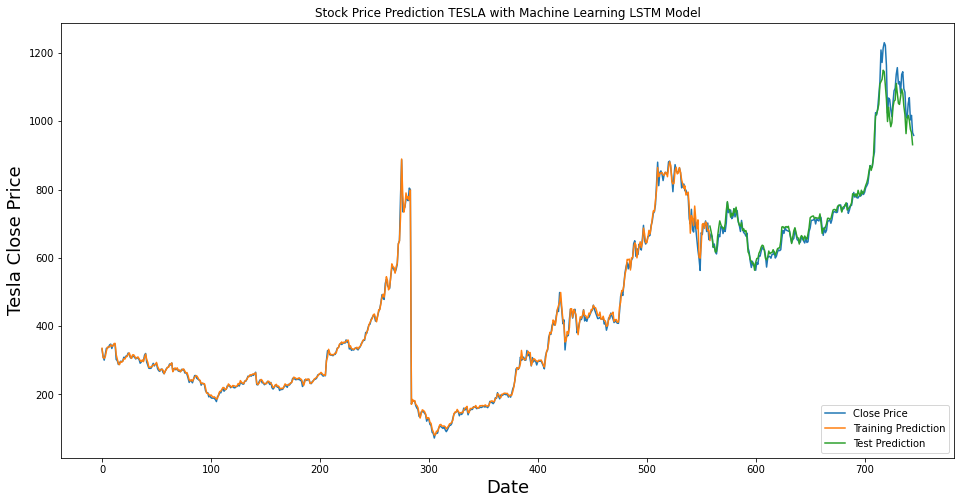

In [706]:
# train = close_values[0:training_data_size, 0:]
# valid.append(predictions)
#x_train = train setimiz, y_train
look_back = 7
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction TESLA with Machine Learning LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tesla Close Price', fontsize=18)
plt.plot(y_values)
plt.plot(train_predict)
plt.plot(np.arange(len(test_predict)) + len(y_train)-1, test_predict)
plt.legend(['Close Price', 'Training Prediction', 'Test Prediction'], loc='lower right')
plt.show()

 

# you seemed to mess up the labels

In [707]:
y_values

array([ 332.799988,  310.119995,  300.359985,  317.690002,  334.959991,
        335.350006,  338.529999,  344.970001,  347.26001 ,  334.399994,
        344.429993,  346.049988,  347.309998,  302.26001 ,  298.920013,
        287.589996,  291.51001 ,  297.040009,  296.380005,  297.459991,
        308.769989,  307.019989,  312.209991,  312.890015,  321.350006,
        317.220001,  307.51001 ,  305.799988,  312.839996,  311.809998,
        308.170013,  303.769989,  307.880005,  305.640015,  302.559998,
        291.230011,  294.709991,  298.769989,  297.859985,  314.73999 ,
        319.880005,  294.790009,  285.359985,  276.540009,  276.23999 ,
        276.589996,  284.140015,  290.920013,  283.359985,  288.959991,
        289.959991,  275.429993,  269.48999 ,  267.470001,  273.600006,
        274.019989,  264.529999,  260.420013,  267.769989,  274.829987,
        278.619995,  279.859985,  289.179993,  285.880005,  291.809998,
        267.779999,  274.959991,  273.200012,  272.309998,  276.

In [708]:
len(y_values)

746

In [709]:
y_values

array([ 332.799988,  310.119995,  300.359985,  317.690002,  334.959991,
        335.350006,  338.529999,  344.970001,  347.26001 ,  334.399994,
        344.429993,  346.049988,  347.309998,  302.26001 ,  298.920013,
        287.589996,  291.51001 ,  297.040009,  296.380005,  297.459991,
        308.769989,  307.019989,  312.209991,  312.890015,  321.350006,
        317.220001,  307.51001 ,  305.799988,  312.839996,  311.809998,
        308.170013,  303.769989,  307.880005,  305.640015,  302.559998,
        291.230011,  294.709991,  298.769989,  297.859985,  314.73999 ,
        319.880005,  294.790009,  285.359985,  276.540009,  276.23999 ,
        276.589996,  284.140015,  290.920013,  283.359985,  288.959991,
        289.959991,  275.429993,  269.48999 ,  267.470001,  273.600006,
        274.019989,  264.529999,  260.420013,  267.769989,  274.829987,
        278.619995,  279.859985,  289.179993,  285.880005,  291.809998,
        267.779999,  274.959991,  273.200012,  272.309998,  276.

In [710]:
x_input = y_values[739:].reshape(1,-1)

In [711]:
x_input.shape

(1, 7)

In [712]:
temp_input = list(x_input)

In [713]:
x_input

array([[1009.01001 , 1051.75    , 1068.959961, 1003.799988, 1017.030029,
         966.409973,  958.51001 ]])

In [714]:
temp_input = temp_input[0].tolist()

In [715]:
temp_input

[1009.01001,
 1051.75,
 1068.959961,
 1003.799988,
 1017.030029,
 966.409973,
 958.51001]

In [716]:
from numpy import array

In [717]:
x_input.shape

(1, 7)

In [718]:
len(temp_input)


7

In [719]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=7
i=0
y_input = x_input.reshape((1,1,n_steps))
x_input = x_input.reshape((1,1,n_steps))

while(i<7):
    print(y_input.shape)
    yhat = model.predict(y_input, verbose= 0)
    y_input[0][0][i] = (yhat[0][0][0].tolist())  #temp_inputun ilk degeri 
    print(yhat[0]) #yhat[0]= 9.10...
    temp_input.extend(yhat[0][0].tolist())  #temp_inputun ilk degeri 
    print(len(temp_input))
    lst_output.extend(yhat.tolist()) #lst_output = [] 
    i=i+1

print(lst_output)

(1, 1, 7)
[[9.674711]]
8
(1, 1, 7)
[[9.584622]]
9
(1, 1, 7)
[[8.249803]]
10
(1, 1, 7)
[[-0.91733915]]
11
(1, 1, 7)
[[0.13468128]]
12
(1, 1, 7)
[[-3.2550735]]
13
(1, 1, 7)
[[-1.3312491]]
14
[[[9.674711227416992]], [[9.584622383117676]], [[8.249802589416504]], [[-0.9173391461372375]], [[0.13468128442764282]], [[-3.2550735473632812]], [[-1.3312491178512573]]]


In [658]:
x_input

array([[[ 9.79385948,  9.74717331,  8.10827541, -2.59585834,
         -1.99052358, -1.58937097,  1.260342  ]]])

In [659]:
x_input.shape

(1, 1, 7)

In [660]:
temp_input

[1009.01001,
 1051.75,
 1068.959961,
 1003.799988,
 1017.030029,
 966.409973,
 958.51001,
 9.793859481811523,
 9.747173309326172,
 8.108275413513184,
 -2.595858335494995,
 -1.9905235767364502,
 -1.5893709659576416,
 1.260342001914978]

In [661]:
yhat

array([[[1.260342]]], dtype=float32)

In [600]:
yhat.shape

(1, 1, 1)